In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\varsh\Downloads\1553768847-housing.csv")

data = data.dropna()

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


In [22]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\varsh\anaconda3\anaconda_3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


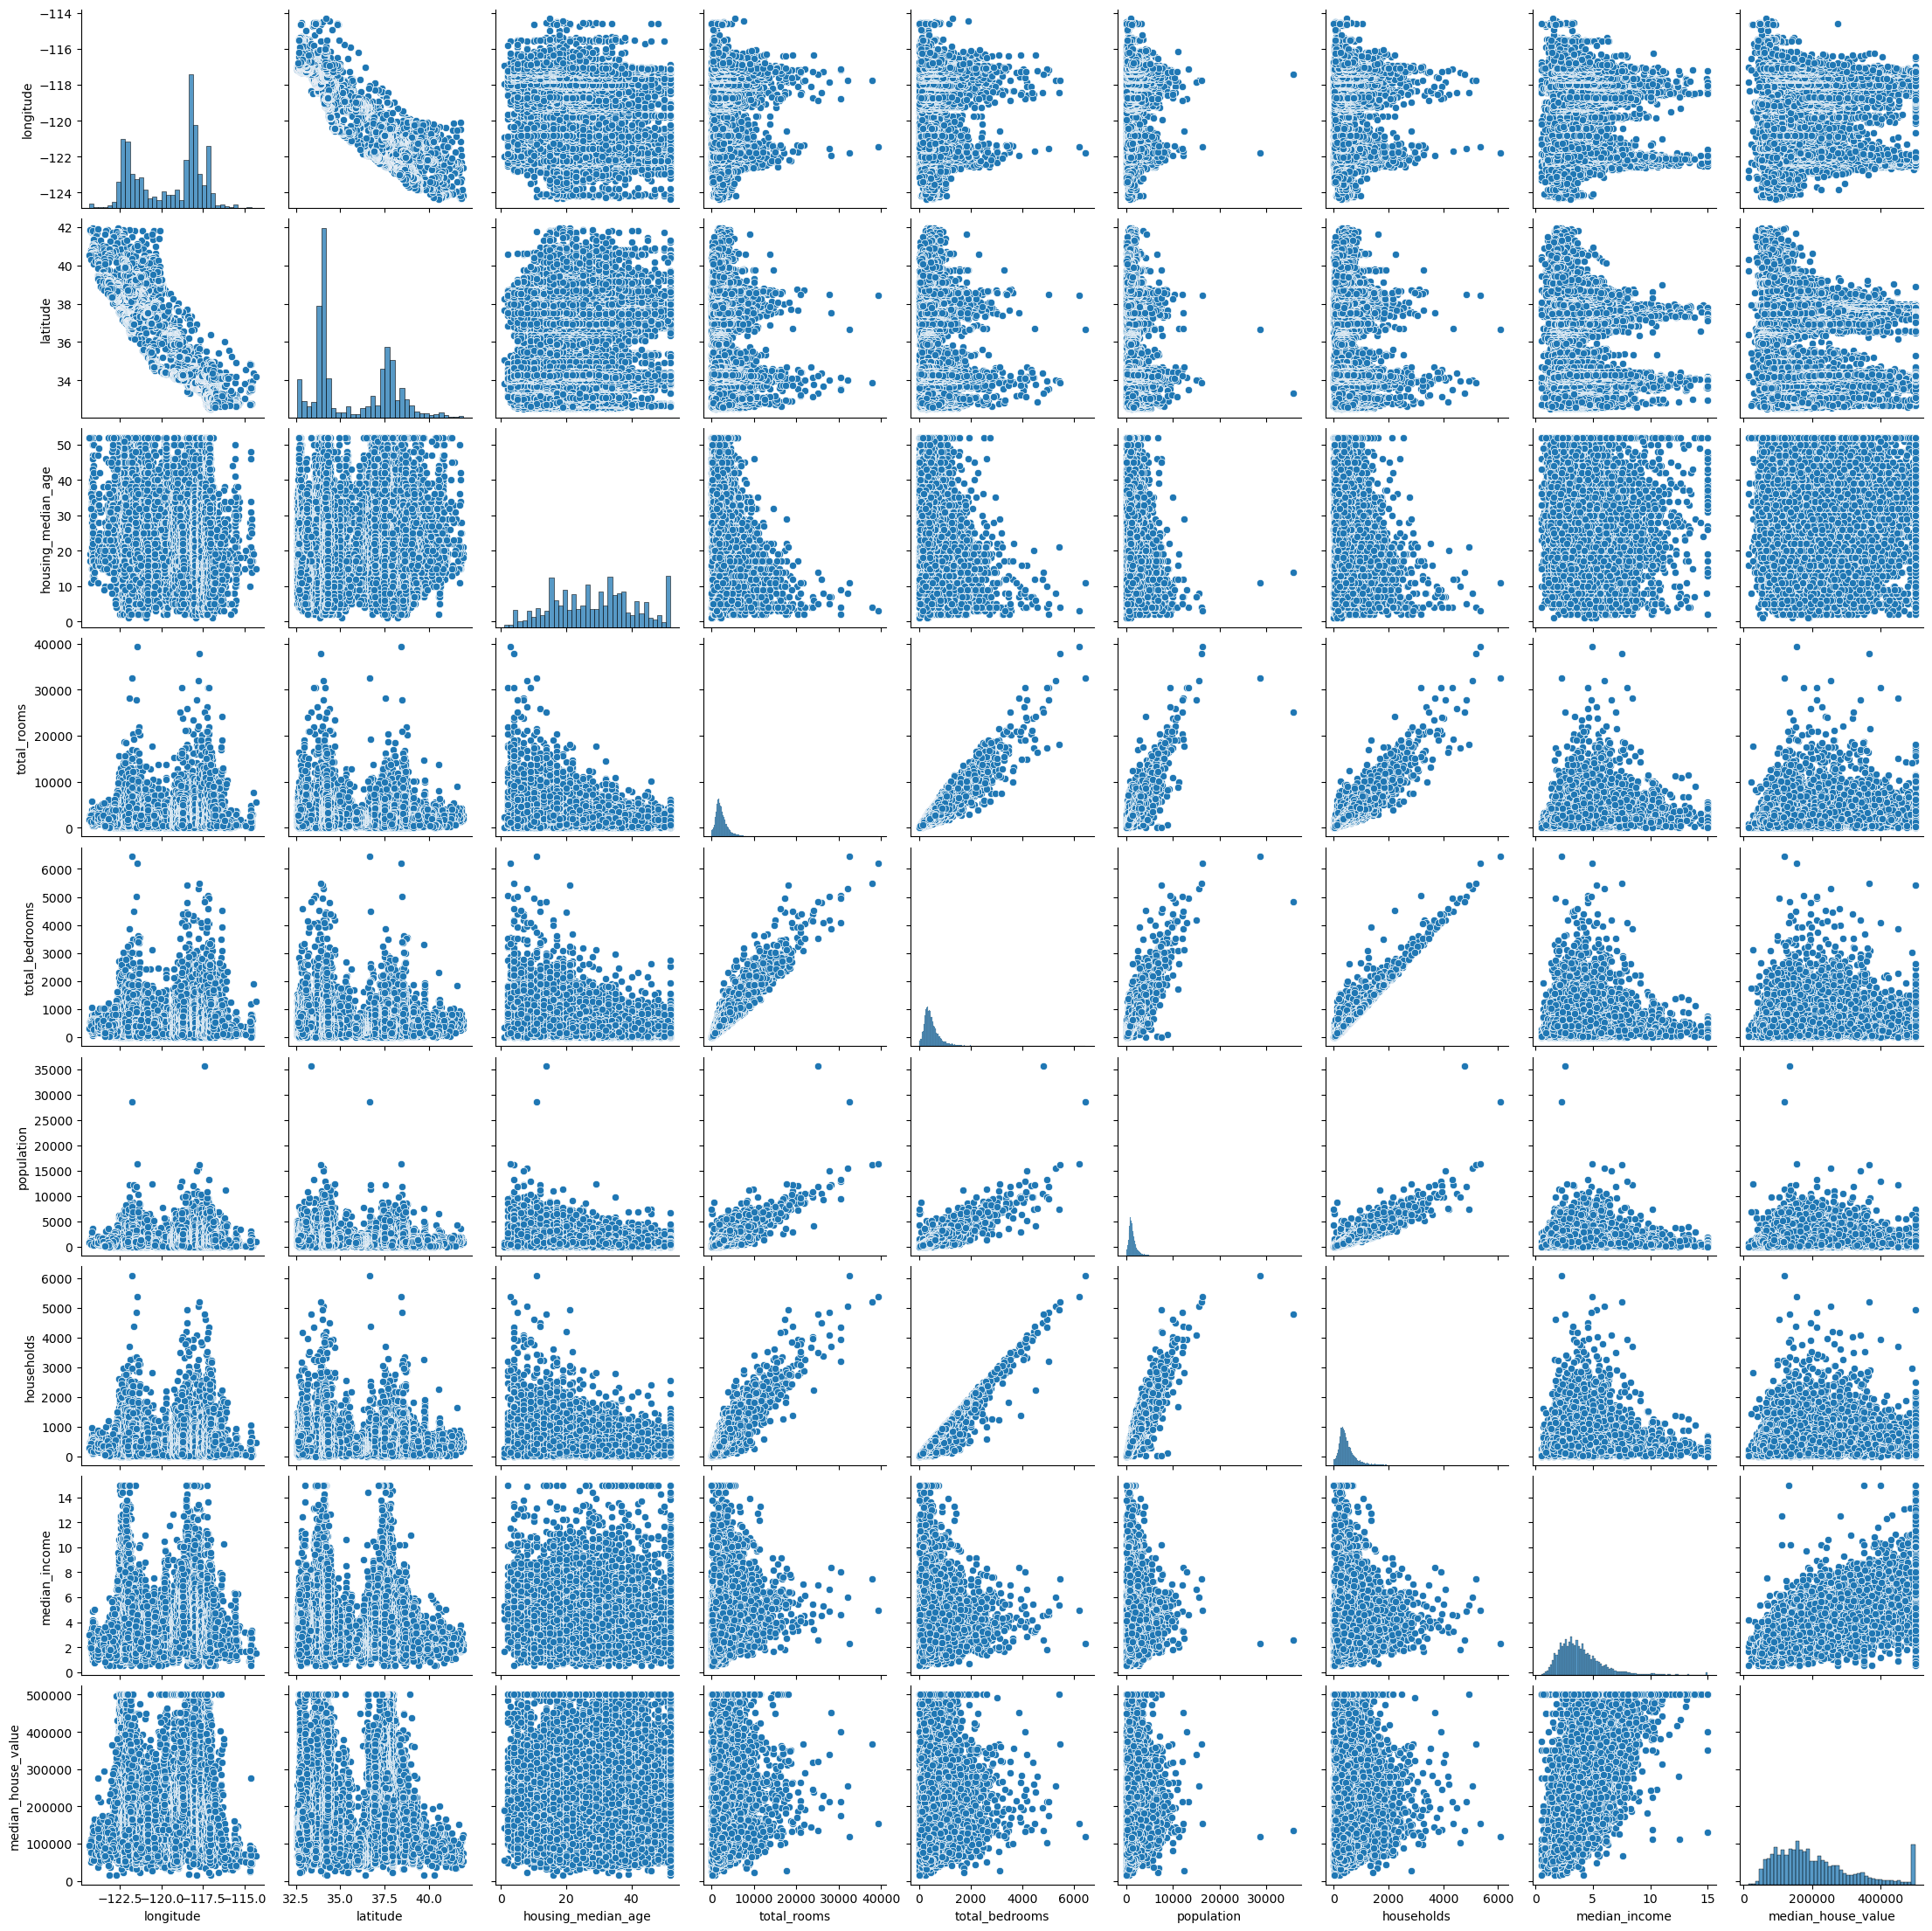

In [23]:
import seaborn as sns

sns.pairplot(data)

<Axes: >

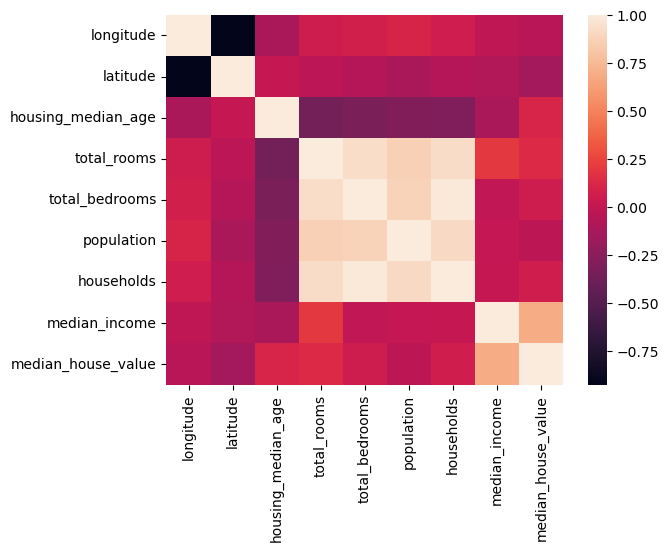

In [24]:
sns.heatmap(data.corr())

In [8]:
data.drop(['ocean_proximity'],axis = 1,inplace = True)

X = data.drop(['median_house_value'],axis = 1)

y = data['median_house_value']

In [11]:
# ! pip install xgboost

### Averaging Method

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

pred_final = (pred_1+pred_2+pred_3)/3.0

print("Test Data")
print("MSE:",mean_squared_error(y_test, pred_final))
print("R2 Score",r2_score(y_test, pred_final))

Test Data
MSE: 2607406637.3310094
R2 Score 0.8110029066677754


### Stacking

The idea behind stacking is to combine predictions from multiple models to improve overall performance. This is achieved by training a meta-model on the predictions of the base models, effectively learning how to best combine their outputs.

In [14]:
# initializing all the base model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()

# putting all base model objects in one list
all_models = [('lr',model_1),('xgb', model_2),('rf', model_3)]

from sklearn.ensemble import StackingRegressor

stacking_regressor = StackingRegressor(estimators=all_models, final_estimator=LinearRegression())

# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = stacking_regressor.predict(X_test)

# Evaluate the performance of the stacking regressor
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
print("R2 Score",r2_score(y_test, predictions))

Mean Squared Error: 2199218437.045373
R2 Score 0.8405903067617883


### Blending

Blending is another ensemble technique similar to stacking, where predictions from multiple base models are combined using a weighted average or another method.

In [20]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=50, random_state=42)

# Train base models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Make predictions on the test set
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# Create a new feature matrix with the predictions of the base models
X_blend_train = np.column_stack((pred1, pred2))

# Train a linear regression model on the blended predictions
blend_model = LinearRegression()
blend_model.fit(X_blend_train, y_test)

# Make predictions on the test set using the blend model
X_blend_test = np.column_stack((model1.predict(X_test), model2.predict(X_test)))
blended_pred = blend_model.predict(X_blend_test)

# Calculate the mean squared error of the blended predictions
mse = mean_squared_error(y_test, blended_pred)
print("Blended MSE:", mse)
print(r2_score(y_test, blended_pred))

Blended MSE: 2469695091.33227
0.8209848870537311


### Bagging

The main idea behind bagging is to train multiple instances of a base learning algorithm on different subsets of the training data and then aggregate their predictions to obtain a final prediction.

In [17]:
from sklearn.ensemble import BaggingRegressor

# initializing the bagging model with default parameters
model = BaggingRegressor()

# training model
model.fit(X_train, y_train)

# predicting the output on the test dataset
pred = model.predict(X_test)

# printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

2673951744.450673
0.8061794044027157


### Boosting

boosting iteratively improves the model's performance by focusing on the instances that are difficult to predict and adjusting subsequent weak learners to correct the errors made by the previous ones, resulting in a strong predictive model

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# initializing the boosting module with default parameters
model = GradientBoostingRegressor()

# training the model on the train dataset
model.fit(X_train, y_train)

# predicting the output on the test dataset
pred_final = model.predict(X_test)

# printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))
print(r2_score(y_test, pred_final))

3150154115.740707
0.7716620173856082
